# Machine Learning Algorithem on Titanic Dataset

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

In [2]:
data = pd.read_csv('../input/titanic-datasets/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

<AxesSubplot:>

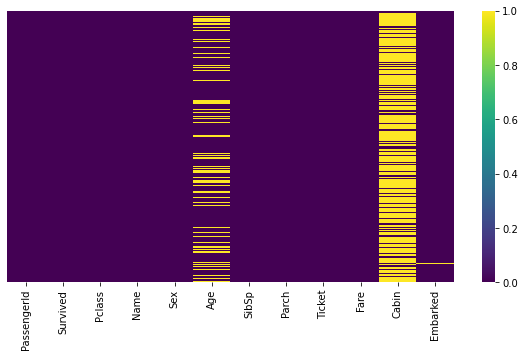

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

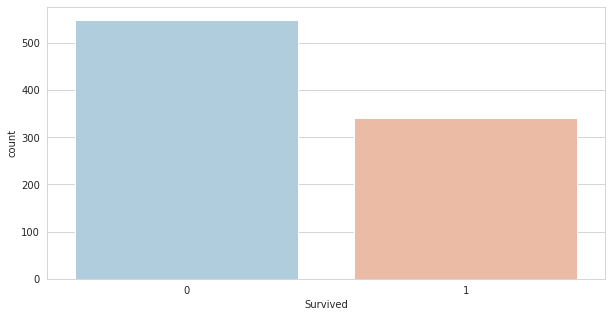

In [4]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

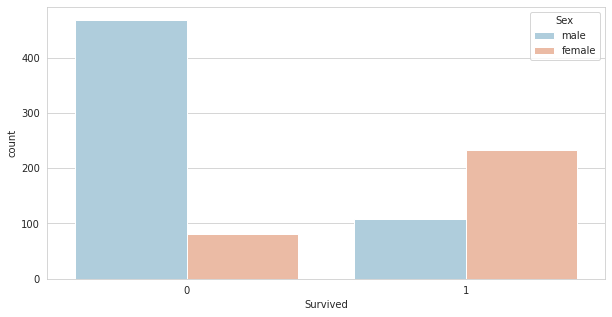

In [5]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

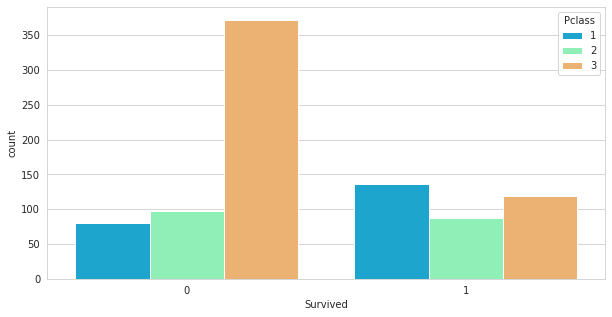

In [6]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data,hue='Pclass', palette='rainbow')

<AxesSubplot:>

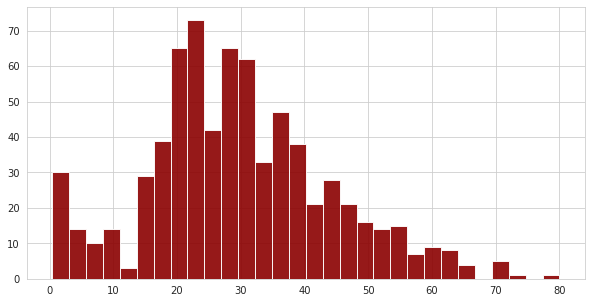

In [7]:
plt.figure(figsize=(10,5))
data['Age'].hist(bins=30, color='darkred', alpha=0.9)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

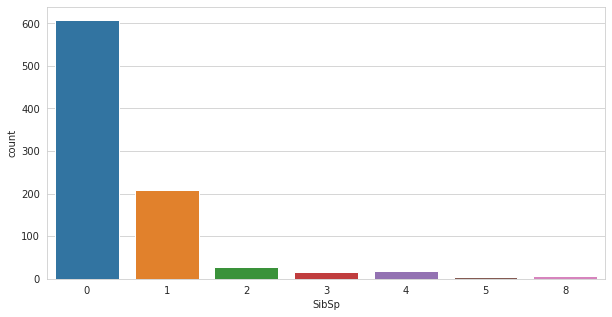

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp', data= data)

<AxesSubplot:>

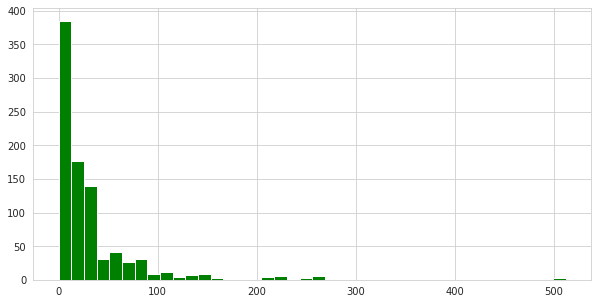

In [9]:
data['Fare'].hist(color='green', bins=40, figsize=(10,5))

## Data Cleaning 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

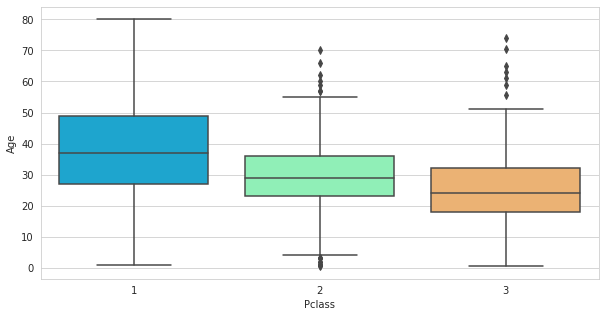

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data= data, palette='rainbow')

 **we make a function that fill the null value as a means of ages with respect to Pclass**

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [12]:
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

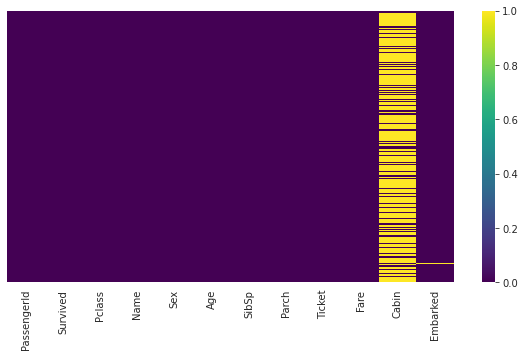

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False, cbar=True, cmap='viridis')

In [14]:
data.drop('Cabin', axis=1, inplace=True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data.dropna(inplace=True)

## Converting Categorical Features

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
data.drop(['Name', 'Sex','Ticket','Embarked'], axis=1, inplace=True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

## Normalizing the Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building a Logistic Regression model

## Training and Predicting of Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
prediction = logreg.predict(X_test)

## Evaluation 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print('Accuracy Score:\n')
print(accuracy_score(y_test, prediction))

Accuracy Score:

0.700374531835206


In [35]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, prediction))

Confusion Matrix:

[[145  24]
 [ 56  42]]


In [36]:
print('Classifition Report:\n')
print(classification_report(y_test, prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       169
           1       0.64      0.43      0.51        98

    accuracy                           0.70       267
   macro avg       0.68      0.64      0.65       267
weighted avg       0.69      0.70      0.68       267



In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


In [38]:
print('Accuracy Score:\n')
print(accuracy_score(y_test, rfc_pred))

Accuracy Score:

0.7340823970037453


# Creating ANN model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

2022-09-26 19:53:58.729304: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-09-26 19:53:58.729456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [40]:
model = Sequential()

2022-09-26 19:54:04.563641: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-26 19:54:04.567277: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-09-26 19:54:04.567313: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-26 19:54:04.567341: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7418217c54b0): /proc/driver/nvidia/version does not exist
2022-09-26 19:54:04.567692: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [41]:
#input layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
#1st hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
#2nd hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
#3rd hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
#4th hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
#5th hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=1,activation='sigmoid'))
#complier model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x=X_train,
 y=y_train,
 epochs=200,
 batch_size=256,
 validation_data=(X_test, y_test),
 )

2022-09-26 19:54:04.959566: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-26 19:54:04.976331: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/200
3/3 [==============================] - 2s 323ms/step - loss: 0.7180 - val_loss: 0.6838
Epoch 2/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6884 - val_loss: 0.6788
Epoch 3/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6922 - val_loss: 0.6741
Epoch 4/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6860 - val_loss: 0.6706
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6862 - val_loss: 0.6686
Epoch 6/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6802 - val_loss: 0.6678
Epoch 7/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6725 - val_loss: 0.6655
Epoch 8/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6764 - val_loss: 0.6613
Epoch 9/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6727 - val_loss: 0.6555
Epoch 10/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6714 - val_loss: 0.6499
Epoch 11/200
3/3 [

In [43]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.713877,0.683795
1,0.684749,0.678840
2,0.688538,0.674146
3,0.685892,0.670623
4,0.694602,0.668640
...,...,...
195,0.507614,0.577645
196,0.516640,0.578647
197,0.510391,0.582406
198,0.508359,0.586936


In [44]:
min(losses['loss'])

0.5050081014633179

<AxesSubplot:>

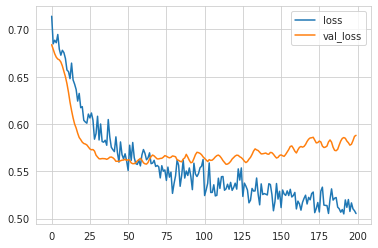

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
ann_prediction = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print('Accuracy Score:\n')
print(accuracy_score(y_test, ann_prediction))

Accuracy Score:

0.7303370786516854


In [48]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, ann_prediction))

Confusion Matrix:

[[149  20]
 [ 52  46]]


In [49]:
print('Classifition Report:\n')
print(classification_report(y_test, ann_prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       169
           1       0.70      0.47      0.56        98

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.68       267
weighted avg       0.73      0.73      0.72       267

